<a href="https://colab.research.google.com/github/SubhadipGhosh07/Bank-Marketing-Effectiveness-Prediction/blob/main/Bank_Marketing_Effectiveness_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b>Problem Description</b> 

### <b>The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).</b>




## <b>Input features:</b>
#### <b> Bank Client data: </b>

* Age: Age of the client
* Job : Profession of the client
* marital : marital status (Whether the client is married, single or divorced)
* Education : Highest level of education of the particular client
* default: Whether the client has defaulted or not
* housing: Whether the client has a housing loan? 
* loan: Whether the client has a personal loan? 

#### <b>Related with the last contact of the current campaign:</b>
* contact: Information on how the client was contacted (unknown, cellular, telephone)
* month: last contact month of year ('jan', 'feb', 'mar', ..., 'nov', 'dec')
* day_of_week: last contact day of the week ('mon','tue','wed','thu','fri')


#### <b>Other attributes: </b>
* campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* previous: number of contacts performed before this campaign and for this client (numeric)
* poutcome: outcome of the previous marketing campaign ('failure','nonexistent','success')


#### <b>Output variable (desired target):</b>
* y - Whether the client subscribed a term deposit or not? ('yes','no')

### <b>We have a feature named "Duration" </b>
last contact duration, in seconds (numeric). This attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
Hence we will be dropping a feature "Duration"

### <b>Revising our Problem Statement:</b>
Our Problem Statement is to predict the 'subscribed' column which has two class labels 0 and 1. Zero corresponds to the client not subscribing to the term deposit and 1 is the label depicting the client has subscribed to the term deposit.


## <b>Importing Libraries:

In [53]:
# Scikit Learn libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score,precision_score, confusion_matrix
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_curve

In [54]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## <b>Reading our dataset:</b>

* Modified our dataset in a readable format


In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
# Reading our dataset
df = pd.read_csv("/content/drive/MyDrive/Bank Marketing Effectiveness Prediction/Resources/Copy of bank-full.csv")
columns = ['age', 'job','marital','education','default','balance','housing','loan','contact','day',
          'month','duration','campaign','pdays','previous','poutcome', 'subscribed']
rows = []
for i,row in df.iterrows():
    rows.append(list(row[0].replace(';',' ').split()))
df = pd.DataFrame(data = rows, columns = columns)

* We need to adjust the contents of our dataset such that we can operate on it.
* We will write a function to remove the quotations from our dataset

In [57]:
# Our dataset still needs work
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,58,"""management""","""married""","""tertiary""","""no""",2143,"""yes""","""no""","""unknown""",5,"""may""",261,1,-1,0,"""unknown""","""no"""
1,44,"""technician""","""single""","""secondary""","""no""",29,"""yes""","""no""","""unknown""",5,"""may""",151,1,-1,0,"""unknown""","""no"""
2,33,"""entrepreneur""","""married""","""secondary""","""no""",2,"""yes""","""yes""","""unknown""",5,"""may""",76,1,-1,0,"""unknown""","""no"""
3,47,"""blue-collar""","""married""","""unknown""","""no""",1506,"""yes""","""no""","""unknown""",5,"""may""",92,1,-1,0,"""unknown""","""no"""
4,33,"""unknown""","""single""","""unknown""","""no""",1,"""no""","""no""","""unknown""",5,"""may""",198,1,-1,0,"""unknown""","""no"""


In [58]:
# Writing a function to remove quotations
def modify(features):
    word = list(features)[1:-1]
    return ''.join(word)

# Applying this above function
feature = ['job','marital','education','default','housing','loan','contact',
          'month','poutcome','subscribed']
for var in feature:
    df[var] = df[var].apply(modify)

In [59]:
# Our dataset after modification
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [60]:
# Copying the dataset
# Checking the info of our dataset
data= df.copy()
data.drop('duration', axis = 1, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         45211 non-null  object
 1   job         45211 non-null  object
 2   marital     45211 non-null  object
 3   education   45211 non-null  object
 4   default     45211 non-null  object
 5   balance     45211 non-null  object
 6   housing     45211 non-null  object
 7   loan        45211 non-null  object
 8   contact     45211 non-null  object
 9   day         45211 non-null  object
 10  month       45211 non-null  object
 11  campaign    45211 non-null  object
 12  pdays       45211 non-null  object
 13  previous    45211 non-null  object
 14  poutcome    45211 non-null  object
 15  subscribed  45211 non-null  object
dtypes: object(16)
memory usage: 5.5+ MB


In [61]:
print("Rows: {}".format(data.shape[0]))
print("Columns: {}".format(data.shape[1]))

Rows: 45211
Columns: 16


<b>Conclusion from our info of the dataset:</b>
 *   Our dataset has no null values
 *   Our dataset has a total of 45211 rows and 15 independent features
 *   Our response variable is the 'subscribed' column

## <b>Dividing our Features into Numeric and Categorical:</b>
* We will be diving our features into Numeric and Categorical features
* This will help us in inspecting our features in a better way
* We will further divide our numeric features into continuous and discrete features
* Will give us a better insight when we go into EDA(Exploratory Data Analysis)
* We will be labeling our response variable into 0 : 'Not Subscribed and 1 : 'Subscribed'

In [62]:
# Dividing our features into numerical and categorical
numerical_feat = ['age','balance','day','campaign','pdays',
                 'previous']
data[numerical_feat] = data[numerical_feat].astype(int)
cat_feat = [feature for feature in data.columns if feature not in numerical_feat]


print("Numeric features: {}".format(numerical_feat))
print("Categorical features: {}".format(cat_feat))

Numeric features: ['age', 'balance', 'day', 'campaign', 'pdays', 'previous']
Categorical features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed']


In [63]:
# Dividing our features into discrete and continuous
disc_f = [var for var in numerical_feat if data[var].nunique() < 50]
cont_f = [var for var in numerical_feat if var not in disc_f]

print("Discrete features: {}".format(disc_f))
print("Continuous features: {}".format(cont_f))

Discrete features: ['day', 'campaign', 'previous']
Continuous features: ['age', 'balance', 'pdays']


In [64]:
# Labeling our response variable 'Subscribed'
data['subscribed'] = data['subscribed'].apply(lambda x: 1 if x == 'yes' else 0)

In [65]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,subscribed
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,0


In [66]:
data['subscribed'].value_counts()

0    39922
1     5289
Name: subscribed, dtype: int64

# <b>Exploratory Data Analysis:</b>
* Firstly, we will be counting the number of people 'Subscribed' to the term deposit or not
* We will be inspecting each of the continuous, discrete and categorical features
* Will be concluding which feature has the most impact on our response variable

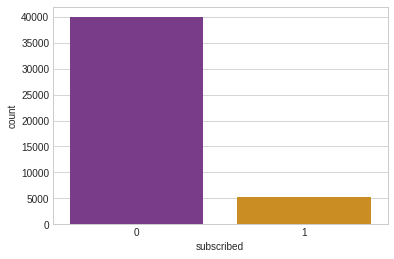

In [67]:
# EDA of response variable
plt.figure(figsize = (6,4))
sns.countplot(data['subscribed'], data = data, palette = 'CMRmap')

<b> Conclusion: </b>
The number of clients subscribed to the term deposit is very less in number than the clients who haven't subscribed to the term deposit. We can conclude that there is a heavy class imbalance, having an odds of 7 to 1 in favor of class 0

### <b>EDA of Continuous Features:</b>
* Will be drawing a distplot for the distribution of each of the continuous feature
* We will be checking the distribution of the continuous features for clients who have subscribed and those who haven't
* Plotting a boxplot to check the distribution of outliers

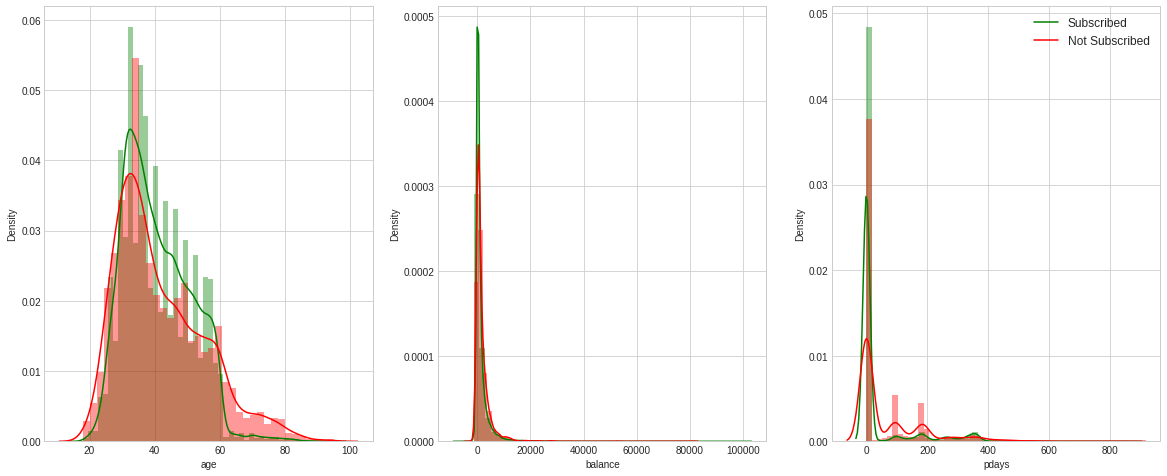

In [68]:
# Plotting distplot to check distribution of features
fig, ax = plt.subplots(1, 3, figsize=(20, 8))
for variable, subplot in zip(cont_f, ax.flatten()):
    sns.distplot(data[variable][data['subscribed'] == 0], ax =subplot, color = 'green')
    sns.distplot(data[variable][data['subscribed'] == 1], ax= subplot, color = 'red')
    plt.legend(['Subscribed','Not Subscribed'], loc = 'best', fontsize = 12)

<b>Conclusion: </b>
* The feature 'Age' gives us some interesting info on our response feature. Although clients upto age group 58 are more interested in term deposits, clients above the age of 60 are not that interested when it comes to subscribing in term deposits.
* The feature 'balance' is heavily right-skewed, there are a large number of outliers. We will check these outliers in the next section by using boxplots.
* The problem with 'Pdays' is there are many Rare Features in pdays, we will dig deep into this feature in the later sections

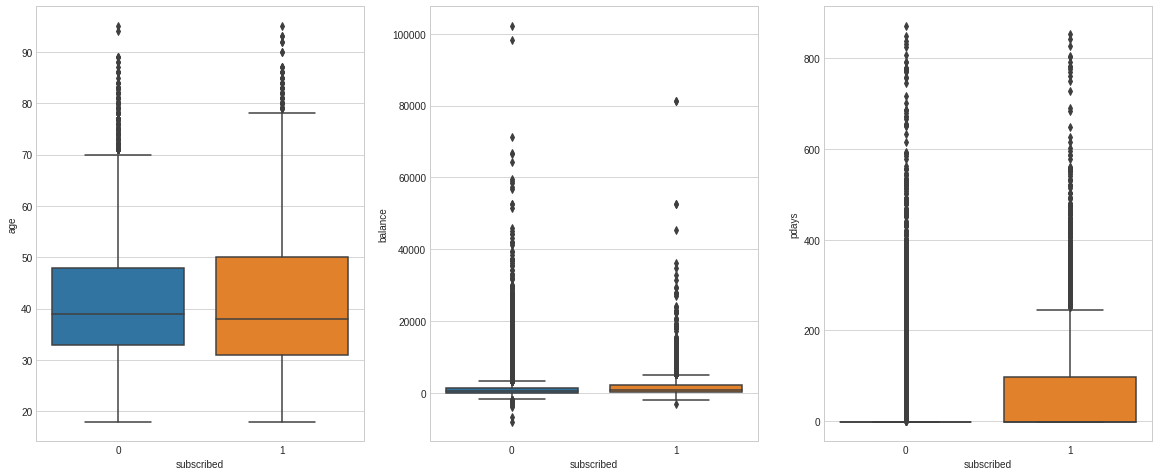

In [69]:
# Plotting boxplots
fig, ax = plt.subplots(1, 3, figsize=(20, 8))
for var, subplot in zip(cont_f, ax.flatten()):
    sns.boxplot(x= 'subscribed', y= var, data=data, ax=subplot)

<b>Conclusion: </b>
* The feature 'Age' is well balanced, has much less impact by outliers. 
* The feature 'balance' is heavily affected by outliers. There are clients having negative balance as well and most of them belong to class 0 that is 'Not subscribed', however there are clients having huge balances but still they haven't subscribed.
* Pdays needs to be worked on, maybe there are many rare values in this feature.

### <b>EDA of Discrete Features:</b>
* We will be lloking at the distributions of each discrete feature for both class labels
* We will also be looking at the counts of clients corresponding to each feature and for each response class label

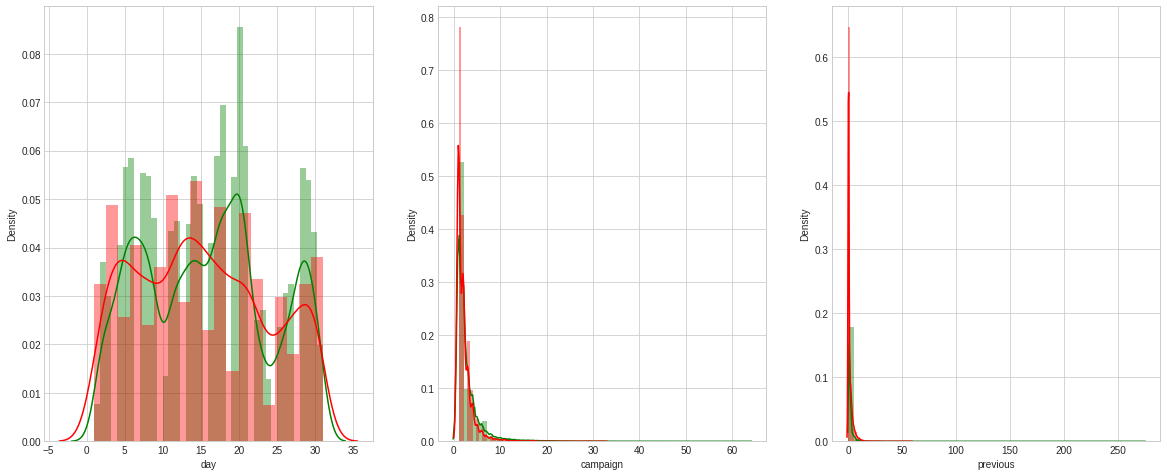

In [70]:
# Distribution of discrete features
fig, ax = plt.subplots(1, 3, figsize=(20, 8))
for variable, subplot in zip(disc_f, ax.flatten()):
    sns.distplot(data[variable][data['subscribed'] == 0], ax =subplot, color = 'green')
    sns.distplot(data[variable][data['subscribed'] == 1], ax= subplot, color = 'red')

<b> Conclusion </b>
* The feature 'Day' tells us the day when the client was last contacted. Day 10-20th of each month had a major increase in subscriptions compared to other days of the month. The subscription numbers declined from 20th-25th almost exponentially. However, clients not subscribing is distributed almost uniformly, but the number has decreased in the days 12-24th of each month.
* The features 'campaign' and 'previous' is also not clear from this distribution because of its skewness, we need to work on these columns in the further sections.

### <b>EDA of Categorical Features: </b>

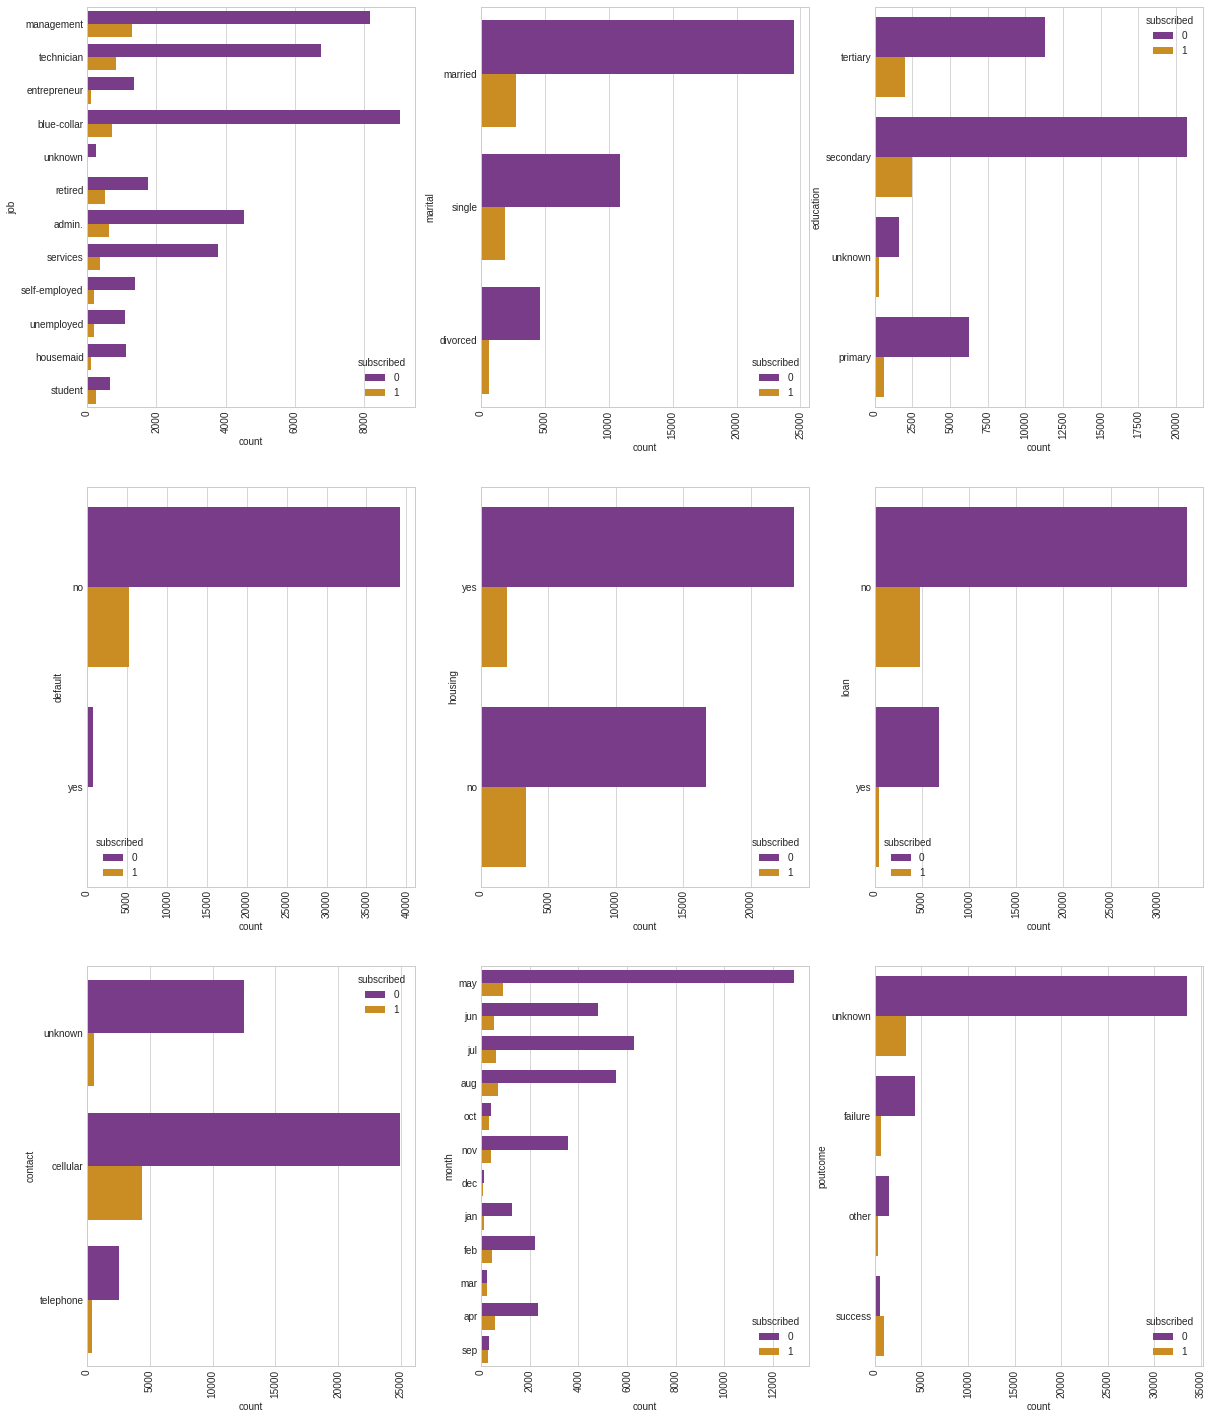

In [71]:
# Plotting a countplot to check the number of clients corresponding to each feature
fig, ax = plt.subplots(3, 3, figsize=(20, 25))
for var, subplot in zip(cat_feat, ax.flatten()):
    sns.countplot(y = var, data=data, ax=subplot, palette = 'CMRmap', hue = 'subscribed')
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

<b> Conclusion: </b>
* Firstly, Students have the least numbers when it comes to subscriptions to term deposit followed by housemaids and unemployed people.(We are not considering 'Unknown'). The target clients are obviously the blue-collared agents, management and technicians.
* Married couples are targeted more by banks for term deposit rather than single and divorced people.
* Most of the targeted clients from education sector are from secondary sectors. Clients who have a record of 'defaults' have received very less calls regarding term deposit subscription.
* Clients having housing loans are targeted more than those who don't have housing loans. However the ratio of people enrolling for the 'Bank Term Deposit' in the latter is more than that of those who have housing loans.
* Clients having a personal loan are much less approached for term deposit.
* The mode of communication that banks prefer is via. cellular type communications, and they prefer telephone the least.
* Banks have last contacted their clients more in the month of May and least in the month of March and December.
* When it comes to the previous marketing campaign, whenever there was a success in marketing for a client peviously, maximum of them have subscribed again, but the same cannot be said in terms of failure.

In [72]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,subscribed
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,0


## <b>Unanswered Questions:</b>
<b> Some of the questions were unanswered in the previous countplots. Some of them were: </b>
* The countplot gave us an info on the targeted audience by the banks. It did not gave us any info about the success rate from those audiences. To be more clear, visually, it was not possible to conclude that which feature had the highest success ratio when it comes to term deposit subscription.
* Which job sector should the banks target most in order to have better numbers of subscriptions?
* What age sector shall the banks target?

To answer many of such questions, firstly we will create a dataset having the mean ages of clients from all the unique job sectors and the counts of clients who have subscribed.

In [73]:
# Using the groupby operation to extract info about unique jobs and their mean ages
job_sub_df = data.groupby('job').agg({'age' : 'mean', 'subscribed' : 'sum'})
job_sub_df.head()

,age,subscribed
job,,
admin.,39.289886,631
blue-collar,40.044081,708
entrepreneur,42.190989,123
housemaid,46.415323,109
management,40.449567,1301


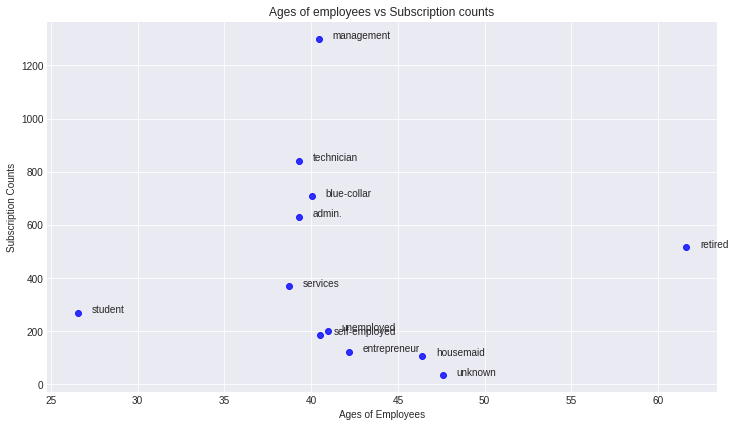

In [74]:
# Drawing a scatter plot for better understanding through visualizations
plt.style.use("seaborn-darkgrid")
plt.figure(figsize = (12,15))
plt.subplot(2,1,1)
for i, job in enumerate(job_sub_df.index):
    x = job_sub_df.iloc[i, 0]
    y = job_sub_df.iloc[i, 1]
    plt.scatter(x, y, color ='blue', alpha = 0.8, edgecolors='blue')
    plt.text(x+0.8, y+0.8, job, fontsize=10)
    plt.title("Ages of employees vs Subscription counts")
    plt.xlabel("Ages of Employees")
    plt.ylabel("Subscription Counts")


<b>Conclusion: </b>
* This scatterplot shows that the highest number of subscriptions comes from management employees with an average age group of just over 40, followed by technicians, blue-collars and administrators. However, the mean age of all these groups are close to 40.
* The least subscriptions are from students, housemaids, self and un-employed clients, and surprisingly entrepreneurs also.
* Retired clients have a decent number of subscription counts with an average age of over 65
* However, this scatterplot stll does'nt tell us the ratio of success in each profession. We will have a look at this in the next section.

In [75]:
# Creating a dataset of employees showing the ratio of success
emp_df = pd.DataFrame(data['job'].value_counts()).reset_index()
emp_df.columns = ['job' , 'total_subs']

# Importing the previous dataset
job_sub_df = job_sub_df.reset_index()
job_sub_df.columns = ['job' , 'avg_age', 'subscribed']

# Merging the two datasets
emp_df = pd.merge(emp_df, job_sub_df, on = 'job')
# introducing a new feature 'fraction of people subscribed from different job sectors'
emp_df['subs_frac'] = emp_df['subscribed'] / emp_df['total_subs']

In [76]:
# ratio of success
emp_df.head()

,job,total_subs,avg_age,subscribed,subs_frac
0,blue-collar,9732,40.044081,708,0.072750
1,management,9458,40.449567,1301,0.137556
2,technician,7597,39.314598,840,0.110570
3,admin.,5171,39.289886,631,0.122027
4,services,4154,38.740250,369,0.088830


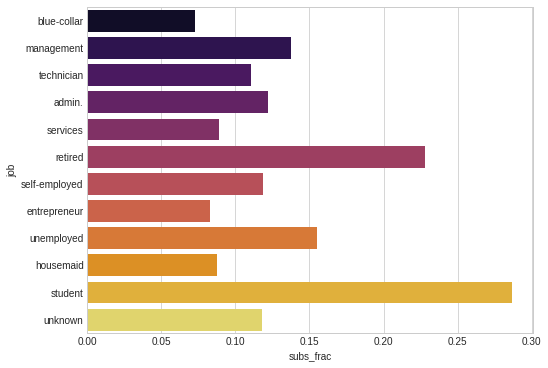

In [77]:
# Plotting success rate of marketing
plt.style.use("seaborn-whitegrid")
plt.figure(figsize = (8,6))
sns.barplot(x = 'subs_frac', y = 'job', data = emp_df, palette = 'inferno')

<b> Conclusion </b>:
* We have got some interesting conclusions to make combining the two above plots that are the scatterplots and the bar chart above
* In the scatterplot we have seen how the targeted audience are mostly from blue-collared, management and administrators.However, the success rate from these groups are quite low owing to only 7%, 12.5% and 11% percent respectively.
* Surprisingly, clients under the subgroups of housemaids, students, unemployed and self-employeed who have been targeted the least, have much higher subscription percentage of a little over 50 percent collectively.

# <b>Feature Engineering:</b>
* Firstly, we had some abnormality in the features 'campaign', 'previous', 'pdays'. We would be operating on these columns by grouping all the values which contribute to less than 1 percent of our total collected clients info, and then putting them in one value naming it 'Rare_val'. In addition to the features I have also added the feature 'Month' as previously we saw the months March and December having the least number of records.
* We will be label encodinfg our months column starting with January as 1, and Rare_val as the last one. Would also be label encoding the 'education' columns starting with primary, ending with tertiary.
* We will also be One hot encoding and target encode some of the features. Will be describing them in the next section.

* We will be checking the dependency of our dummy features with respect to our response feature using chi square test.
* Remmoving Outliers using IQR
* Plotting a correlation heatmap

In [78]:
# Separating values from rare values(contributing to less than 1.2 perecent to the overall records)

official_features = ['campaign','pdays','previous','month']
for var in official_features:
    ii = data[var].value_counts().index
    counts = data[var].value_counts().values
    temp = [i for i,freq in list(zip(ii, counts)) if freq/45211 < 0.012]
    data[var] = np.where(data[var].isin(temp), 'Rare_val', data[var])

The reason I haven't converted the feature 'JOB' into Rare_val is because it had only one feature value which is 'Unknown' which contributed to less than 1% of the total records. So I kept as it is, assuming it to be a rare val.

## <b>Target Label encoding, Label Encoding and One Hot Encoding:</b>
As discussed in the previous sections we will be focussed more on the ratio of success in subscriptions rather than the number of people subscribed. Just to give an idea, Let's assume a situation(A) where the bank has called over 1000 clients and 90 of them have subscribed. In another scenario, let's say situation(B), 100 clients have been called and 15 have subscribed. 
If we just assign the values in a feature in an increasing order of their counts, then or model will emphasize more on situation A as counts are more, ignoring the fact that percent of success was more in situation B. So instead of label encoding some of the features like job, previous, campaign, day and month, we would go with target encoding. This will give a better understanding to the model as to which value to emphasize more on.

Just for a sample, a demonstration of the feature 'Job' has been shown below where subs_frac is the feature showing the fraction of the successful subscriptions of all the job sectors. Have target encoded the rest of the features in the later section.

In [79]:
# Our employee dataset from before
emp_df.head(20)

,job,total_subs,avg_age,subscribed,subs_frac
0,blue-collar,9732,40.044081,708,0.072750
1,management,9458,40.449567,1301,0.137556
2,technician,7597,39.314598,840,0.110570
3,admin.,5171,39.289886,631,0.122027
4,services,4154,38.740250,369,0.088830
5,retired,2264,61.626767,516,0.227915
6,self-employed,1579,40.484484,187,0.118429
7,entrepreneur,1487,42.190989,123,0.082717
8,unemployed,1303,40.961627,202,0.155027
9,housemaid,1240,46.415323,109,0.087903


In [80]:
# Creating an empty dictionary
emp_dict = {}
for i in range(len(emp_df)):
    a = emp_df.loc[i, 'job']
    b = emp_df.loc[i, 'subs_frac']
    emp_dict[a] = b

# Storing the job name as key and the fraction as values
# Mapping the values in the original dataset
data['job'] = data['job'].map(emp_dict)

In [81]:
# Our dataset after target encoding our job feature
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,subscribed
0,58,0.137556,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,0
1,44,0.110570,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,0
2,33,0.082717,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,0
3,47,0.072750,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,0
4,33,0.118056,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,0


### <b>Label encoding:</b>
* Firstly, we will label encode 'Months' and then feed it to target encoding.
* Secondly,we will label encode the 'Education' feature as well.

In [82]:
month_dict = {'jan' : 1, 'feb' : 2, 'apr': 3, 'may' : 4,
             'jun' : 5, 'jul' : 6, 'aug' : 7, 'sep' : 8,
             'oct' : 9, 'nov' : 10, 'Rare_val' : 11}
data['month'] = data['month'].map(month_dict)

In [83]:
# Writing a function for label encoding
def ordinal_encode(education):
    if education == 'unknown':
        return 0
    elif education == 'primary':
        return 1
    elif education == 'secondary':
        return 2
    else:
        return 3
    
# Label encoding
data['education'] = data['education'].apply(ordinal_encode)

In [84]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,subscribed
0,58,0.137556,married,3,no,2143,yes,no,unknown,5,4,1,-1,0,unknown,0
1,44,0.110570,single,2,no,29,yes,no,unknown,5,4,1,-1,0,unknown,0
2,33,0.082717,married,2,no,2,yes,yes,unknown,5,4,1,-1,0,unknown,0
3,47,0.072750,married,0,no,1506,yes,no,unknown,5,4,1,-1,0,unknown,0
4,33,0.118056,single,0,no,1,no,no,unknown,5,4,1,-1,0,unknown,0


### <b>Target Encoding and One Hot Encoding </b>
* In the previous section, we converted the month feature into labels and then we will be target encoding them
* We will be writing down a function which one hot encodes the other features

In [85]:
# target encoding
feature = ['previous','campaign','day','month']

for var in feature:
    empty_dict = {}
    a = data[var].value_counts().sort_index().values
    a_index = data[var].value_counts().sort_index().index
    b = data[var][data['subscribed'] == 1].value_counts().sort_index().values
    l = b/a
    for i,ii in enumerate(a_index):
        empty_dict[ii] = l[i]
    data[var] = data[var].map(empty_dict)
    


    
# writing a function for one hot encode
def one_hot_encode(data, feature_dict):
    data = data.copy()
    for col, pref in list(feature_dict.items()):
        data = pd.get_dummies(data, columns = [col], prefix = [pref], drop_first = True)
    return data


# Applying the function
data = one_hot_encode(data,{'marital' : 'mar',
                             'default' : 'def',
                             'housing' : 'house',
                             'loan' : 'loan','contact':'cont','poutcome' : 'pout',
                             'pdays':'pdays'})



In [86]:
# Our final dataset after completing all types of encoding
data.head()

,age,job,education,balance,day,month,campaign,previous,subscribed,mar_married,mar_single,def_yes,house_yes,loan_yes,cont_telephone,cont_unknown,pout_other,pout_success,pout_unknown,pdays_Rare_val
0,58,0.137556,3,2143,0.112565,0.067195,0.145976,0.091573,0,1,0,0,1,0,0,1,0,0,1,0
1,44,0.110570,2,29,0.112565,0.067195,0.145976,0.091573,0,0,1,0,1,0,0,1,0,0,1,0
2,33,0.082717,2,2,0.112565,0.067195,0.145976,0.091573,0,1,0,0,1,1,0,1,0,0,1,0
3,47,0.072750,0,1506,0.112565,0.067195,0.145976,0.091573,0,1,0,0,1,0,0,1,0,0,1,0
4,33,0.118056,0,1,0.112565,0.067195,0.145976,0.091573,0,0,1,0,0,0,0,1,0,0,1,0


## <b>Dependency of our discrete features with our Response Feature using Chi Square Test:</b>
* As we have a lot of dummy features to work with, we will be looking into the relation of each dummy feature with the response variable and check if they are statistically significant.
* We will use the scikit learn library to use chi2 and this will return us two values, the f values and the p values. the higher the f value, the more sigificant will be that feature.
* We will be assuming our null hypothesis to be that the feature does not have any relation with our dependent feature. And if the p value is more than 0.05, we will remove that feature assuming our null hypothesis to be true.

In [87]:
# Dividing the dummy features from the response feature
test_col = data.drop(['age','balance','subscribed'], axis = 1)
y = data['subscribed']

from sklearn.feature_selection import chi2
f_p_value = chi2(test_col,y)

In [88]:
chi2_df = pd.DataFrame(f_p_value, columns = test_col.columns)
chi2_df.index = ['f value', 'p value']
chi2_df = chi2_df.transpose()
chi2_df.head(20)

,f value,p value
job,13.653570,2.198230e-04
education,35.069469,3.181501e-09
day,6.436125,1.118223e-02
month,182.626780,1.293928e-41
campaign,2.355764,1.248207e-01
previous,33.222131,8.220955e-09
mar_married,65.352757,6.262225e-16
mar_single,130.835717,2.689699e-30
def_yes,22.313875,2.315277e-06
house_yes,388.949715,1.401285e-86


In [89]:
data.drop(['campaign', 'day'], axis = 1, inplace = True)

<b> Conclusion: </b>
From the above table we can say all our features are highly significant with respect to the response feature, and so we won't be removing any feature as of now.
As we have tested out the features with respect to the response feature, and not with each other, this does'nt give us an idea about whether the features are correlated with each other or not. It just shows us the dependancy of each dummy variable with the response feature.

## <b>Outliers Treatment:</b>
* Replacing the outliers in our dataset using the IQR method(Inter-Quartile range)
* Plotting a distribution plot and a boxplot to analyse outliers after IQR treatment

In [90]:
# Using IQR method to treat outliers
cont_feat = [feature for feature in data.columns if data[feature].nunique() > 31]
for feat in cont_feat:
    q1,q3 = np.percentile(data[feat], 25), np.percentile(data[feat], 75)
    iqr = q3 - q1
    l_lim,u_lim = q1 - 1.5*iqr, q3 + 1.5*iqr
    store = data[feat][(data[feat] > l_lim) & (data[feat] < u_lim)].values
    data[feat] = np.where(data[feat].isin(store), data[feat], data[feat].median())

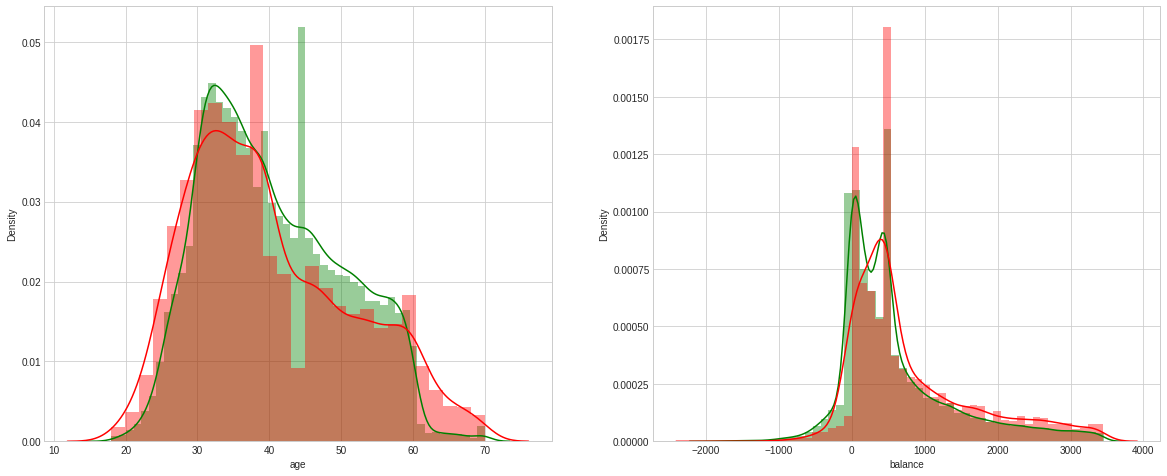

In [91]:
# Plotting a distribution plot
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
for variable, subplot in zip(cont_feat, ax.flatten()):
    sns.distplot(data[variable][data['subscribed'] == 0], ax =subplot, color = 'green')
    sns.distplot(data[variable][data['subscribed'] == 1], ax= subplot, color = 'red')

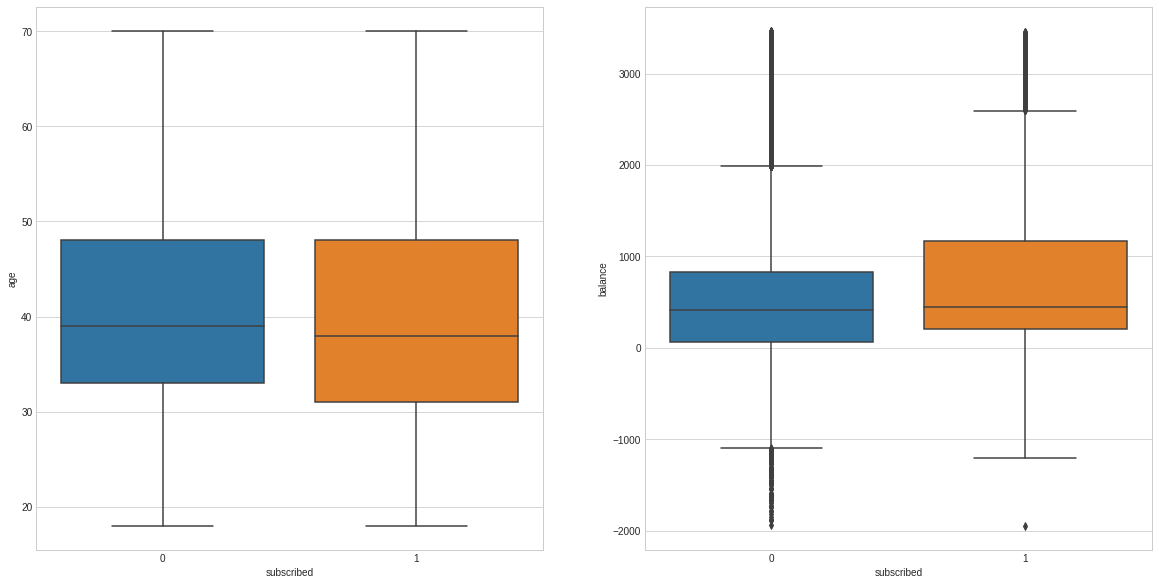

In [92]:
# Plotting a boxplot after Outlier treatment
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
for var, subplot in zip(cont_feat, ax.flatten()):
    sns.boxplot(x= 'subscribed', y= var, data=data, ax=subplot)

<b>Conclusion:</b>
* Outliers from both of our features are now treated with. Although the feature "Age" did not have outliers to start with.
* The feature 'Balance' was heavily influenced by outliers. After treatment, the distribution looks fair where most of the clients have a balance close to 500 US dollars in case of successful subscriptions to term deposit.
* A higher group of clients have negative balances in case of unsuccessful subscriptions. 

## <b>Correlation heatmap:</b>
* We don't want our dataset having features related strongly with each other. However, if the relation is moderate, the correlation can be ignored.
* We won't be removing the highly correlated features as of now. We will let our Feature Selection technique do it for us.

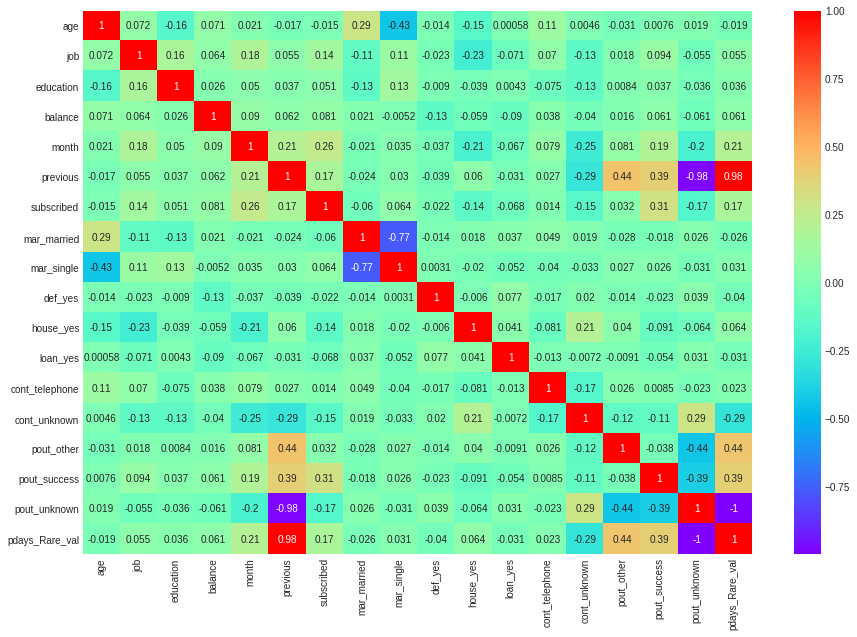

In [93]:
#drawing a correlation heatmap
plt.figure(figsize = (15,10))
sns.heatmap(data.corr(), annot = True, cmap = 'rainbow')

<b> Conclusion: </b>
As we can see there are some strong correlations among the features pdays_Rare_val, pout_unknown and so on. In the next section we will be lloking at how our Feature selection technique removes these features for us.

# <b>Feature Selection using ExtraTreesClassifier:</b>
* We will be using ExtraTreesClassifier as our feature selection expert.
* Will be separating the independent features and the response feature before fitting it to our model.
* Will also be plotting the features in order of increasing importance in a bar plot.
* We will update the X value by removing the unwanted features

In [94]:
data.head()

,age,job,education,balance,month,previous,subscribed,mar_married,mar_single,def_yes,house_yes,loan_yes,cont_telephone,cont_unknown,pout_other,pout_success,pout_unknown,pdays_Rare_val
0,58.0,0.137556,3,2143.0,0.067195,0.091573,0,1,0,0,1,0,0,1,0,0,1,0
1,44.0,0.110570,2,29.0,0.067195,0.091573,0,0,1,0,1,0,0,1,0,0,1,0
2,33.0,0.082717,2,2.0,0.067195,0.091573,0,1,0,0,1,1,0,1,0,0,1,0
3,47.0,0.072750,0,1506.0,0.067195,0.091573,0,1,0,0,1,0,0,1,0,0,1,0
4,33.0,0.118056,0,1.0,0.067195,0.091573,0,0,1,0,0,0,0,1,0,0,1,0


In [95]:
# Separating the X and y values:
X = data.drop('subscribed', axis = 1)
y = data['subscribed']

In [96]:
from sklearn.ensemble import ExtraTreesClassifier
selection = ExtraTreesClassifier()
selection.fit(X,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

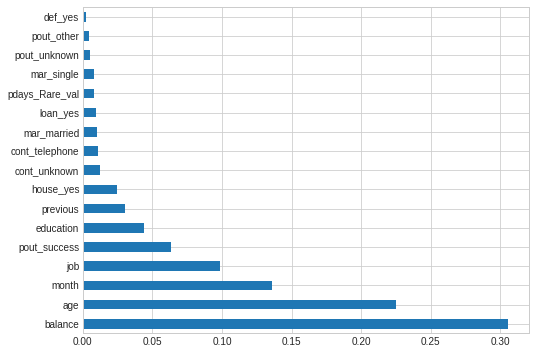

In [97]:
# plot graph of feature importances for better visualization -->
plt.figure(figsize = (8,6))
feature_importances = pd.Series(selection.feature_importances_, index = X.columns)
feature_importances.nlargest(X.shape[1]).plot(kind = 'barh')
plt.show()

<b> Conclusion: </b>
* As observed in the correlation heatmap, the ExtraTreesClassifier has predicted that the features such as pout_unknown, pout_other, def_yes and some other features are the least significant to our model and they can be safely ignored.
* However on the other hand, balance, age, day, month and job are some of the most important features to our dataset. As ew know which features to use in our model prediction, the next thing to deal with is the class imbalance.

# <b>Dealing with class Imbalance using SMOTEENN:</b>
* Checking the value counts of both class labels
* We will scale the features using StandardScaler
* We will be using SMOTEENN to deal with class imbalance with a sampling strategy of 0.5.
* What SMOTEENN basically does is, oversample the minority class by 50 percent using synthetic data points(as sampling strategy = 0.5) and at the same time undersampling the majority class by 50 percent.
* Because applying SMOTEENN we will be standardizing our features in the same scale as SMOTEENN calculates the nearest minority class neighbors using a distance metric, for that the features need to be in the same scale.

In [98]:
# Updating X, by choosing the ten best features from the ExtraTreesClassifier model
top_feat = list(feature_importances.nlargest(8).index)
X = data[top_feat]
y = data[['subscribed']]

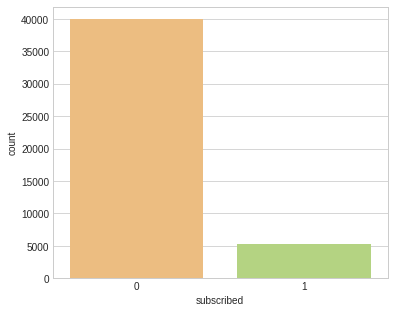

In [99]:
# Countplot of classes before treatment
plt.figure(figsize = (6,5))
sns.countplot('subscribed', data = data, palette = 'RdYlGn')

<b> Conclusion:</b>
There is a heavy class imbalance of over 7 to 1 odds ratio. We need to treat this imbalance if we want our model to predict the minority class label with greater precision.

In [100]:
# Using standard scaler to scale our independent feature
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X.head()

,balance,age,month,job,pout_success,education,previous,house_yes
0,1.900950,1.760223,-0.595673,0.470643,-0.185948,1.206484,-0.465509,0.893915
1,-0.738276,0.349717,-0.595673,-0.146767,-0.185948,-0.077715,-0.465509,0.893915
2,-0.771984,-0.758537,-0.595673,-0.784026,-0.185948,-0.077715,-0.465509,0.893915
3,1.105686,0.651969,-0.595673,-1.012068,-0.185948,-2.646114,-0.465509,0.893915
4,-0.773233,-0.758537,-0.595673,0.024498,-0.185948,-2.646114,-0.465509,-1.118674


In [101]:
from imblearn.combine import SMOTEENN
# using SMOTEENN 
sample = SMOTEENN(sampling_strategy=0.5, random_state = 0)
# fitting to our actual X and y values
X_over, y_over = sample.fit_resample(X, y)

In [113]:
# Converting X_over, y_over to dataframes
X_over = pd.DataFrame(X_over, columns = X.columns)
y_over = pd.DataFrame(y_over, columns = ['subscribed'])

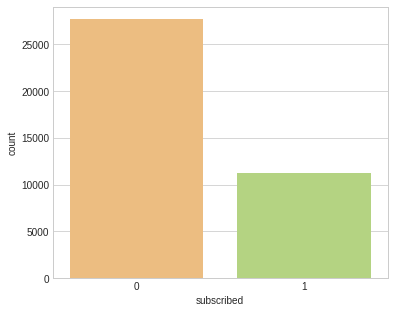

In [117]:
# Checking the count of labels using a countplot after treating with SMOTEENN
plt.figure(figsize = (6,5))
sns.countplot('subscribed', data = y_over, palette = 'RdYlGn')

<Figure size 2160x720 with 0 Axes>

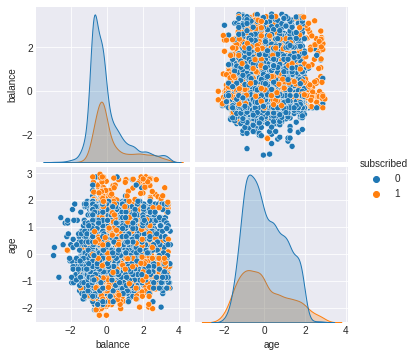

In [118]:
# Checking the distributions of our dataset using scatterplot after using SMOTEENN
data_sample = X_over.copy()
plt.style.use("seaborn-darkgrid")
data_sample['subscribed'] = y_over
samp = data_sample.sample(5000)
plt.figure(figsize = (30,10))
sns.pairplot(samp[['balance','age','subscribed']], hue = 'subscribed', data = samp)

<b> Conclusion:</b>
The class imbalance still persists, our model is not balanced, however the odds ratio in this case is close to 3:1, which is much lower than before.

# <b>Fitting and Evaluation of our Model:</b>
* Firstly, we will be using train_test_split to split our dataset
* We will be fitting different models to our training dataset and evaluate on our test dataset to check which model gives the highest accuracy

In [119]:
# Splitting into X and y
X_train, X_test, y_train, y_test = train_test_split(X_over,y_over, test_size = 0.2, random_state = 0,
                                                   stratify = y_over)

## <b>RandomForest Classifier:</b>
* We will be selecting the best hyper-paramters by cross-validating them through RandomizedSearchCV
* Evaluating our model

In [120]:
# Using RandomizedSearchCV
rndm_f  = RandomForestClassifier()
params = {'n_estimators' : [750, 850],
         'max_depth': [7,9],
         'max_features' : [7,8],
         'min_samples_leaf' : [2,3]}

cv = RandomizedSearchCV(rndm_f, param_distributions = params, scoring = 'roc_auc', random_state = 0, cv =5)
cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [121]:
# Choosing the best parameters
cv.best_params_

{'max_depth': 9, 'max_features': 7, 'min_samples_leaf': 2, 'n_estimators': 750}

In [122]:
# Prediciting the test data after selecting the best hyperparameters

rndm_f  = RandomForestClassifier(n_estimators = 750, min_samples_leaf = 2, 
                                max_features = 7, max_depth = 9)
rndm_f.fit(X_train, y_train)
y_pred_f = rndm_f.predict(X_test)
y_prob = rndm_f.predict_proba(X_test)

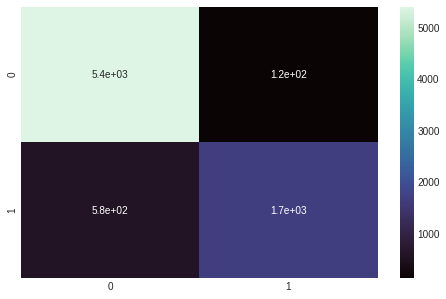

In [123]:
plt.figure(figsize = (8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_f), annot = True, cmap = 'mako')

In [124]:
# Printing the classification_report
print(classification_report(y_test, y_pred_f))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      5525
           1       0.93      0.74      0.83      2255

    accuracy                           0.91      7780
   macro avg       0.92      0.86      0.88      7780
weighted avg       0.91      0.91      0.91      7780



#### <b>Conclusion:</b>
* As our class has an imbalance in the ratio of 3:1, we won't be using accuracy as a metric in this case.
* We will be using precision-recall as a metric depending on our problem statement.
* From the above report we observe that our model has a high precision of 0.93 for our class label 1 and a recall score of 0.74.

However in the above report we have the default threshold by default is 0.5. Which means a probability value of over 0.5 and below 0.5 will change the class label. But I want my model to be tested against different thresholds while predicting the class 1 level(predicting whether a client has subscribed to the term deposit or not).

To do this, we need to change the thresholds and see how our model is predicting for different thresholds. We will use a Binarizer to change the Threshold in the following section.

## <b>Using Binarizer to change threshold values:</b>
* Firstly, plotting a Precision-Recall curve for the default threshold of 0.5
* We would write a function such that we can get a table depicting the precision and recall scores for a given threshold.

In [125]:
from sklearn.preprocessing import Binarizer

In [126]:
# Writing a function which will return me the recall and probabilities of each threshold

def plot_pr_curve(y_true, y_proba, thresholds):
    rec_, prec_ = [],[]
    for thres in thresholds:
        pred_updated = Binarizer(threshold = thres).fit_transform(y_proba)
        tn, fp, fn, tp = confusion_matrix(y_true, pred_updated[:,1]).ravel()
        recall = tp/(tp + fn)
        precision = tp/(tp+fp)
        rec_.append(recall)
        prec_.append(precision)
    return rec_,prec_

In [127]:
# Applying the above function
plot_pr_curve(y_test,y_prob, np.linspace(0.1, 0.99, 10))
pr = pd.DataFrame(plot_pr_curve(y_test,y_prob, np.linspace(0.1, 0.99, 10))).transpose()
pr.index = np.linspace(0.1, 0.99, 10)
pr.columns = ['Recall', 'Precision']
pr['F1 score'] = (2 * pr['Recall'] * pr['Precision']) / (pr['Precision'] + pr['Recall'])

In [128]:
pr.index.rename('Threshold', inplace = True)
# Let's check our dataset
pr.head(10)

,Recall,Precision,F1 score
Threshold,,,
0.100000,0.956098,0.477202,0.636646
0.198889,0.848780,0.800167,0.823757
0.297778,0.782262,0.900919,0.837408
0.396667,0.766297,0.916711,0.834783
0.495556,0.742794,0.930556,0.826141
0.594444,0.705543,0.942536,0.807000
0.693333,0.670953,0.952771,0.787406
0.792222,0.623503,0.967653,0.758360
0.891111,0.540133,0.973621,0.694809


Text(0.5, 1.0, 'Precision vs Recall')

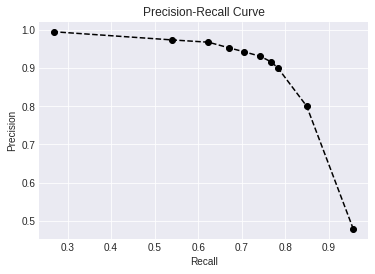

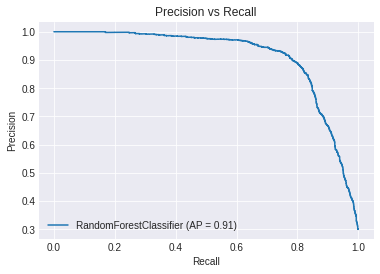

In [129]:
# Plotting the roc-curve
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_curve
plt.style.use("seaborn-darkgrid")

plt.figure(figsize = (13, 4))
plt.subplot(1,2,1)
plt.plot(pr['Recall'], pr['Precision'], '--ok')
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")

plot_precision_recall_curve(rndm_f,X_test, y_test)
plt.title("Precision vs Recall")

#### <b>Conclusion from the above dataset for RandomForestClassifier:</b>
* If we aim to have a higher recall at the cost of precision, from the above dataset we would go with a threshold of 0.20.
* However, if we want a high precision, we may go with threshold of 0.90. If we want to have a better overall score of precision and recall, we can so with a threshold of 0.30, with a F1 score of 0.84.
* The overall AP or the weighted average precision or the area under the precision-recall curve is coming out to be 0.91 for threshold 0.5, which shows our model is performing well.



## <b>K-Nearest Neighbors Classifier:

In [130]:
# Using hyperparameter tuning to get the opimal value of n_neighbors
neighbors = KNeighborsClassifier()
params = {'n_neighbors' : [9,11,13,15]}
cv = RandomizedSearchCV(neighbors, random_state = 0, cv = 10, param_distributions = params)
cv.fit(X_train,y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'n_neighbors': [9, 11, 13, 15]},
                   pre_dispatch='2*n_jobs', random_state=0, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [131]:
cv.best_params_

{'n_neighbors': 9}

In [132]:
# Fitting KNN
neighbors = KNeighborsClassifier(n_neighbors = 9)
neighbors.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [133]:
y_pred_knn = neighbors.predict(X_test)
y_pred_proba_knn = neighbors.predict_proba(X_test)
# Printing precision score
precision_score(y_pred_knn, y_test)

0.8545454545454545

In [134]:
print(classification_report(y_pred_knn, y_test))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      5588
           1       0.85      0.88      0.87      2192

    accuracy                           0.92      7780
   macro avg       0.90      0.91      0.91      7780
weighted avg       0.92      0.92      0.92      7780



In [135]:
# Applying the above function
knn_threshold = pd.DataFrame(plot_pr_curve(y_test,y_pred_proba_knn, np.linspace(0.1, 0.99, 10))).transpose()
knn_threshold.columns = ['Recall', 'Precision']
knn_threshold.index = np.linspace(0.1, 0.99, 10)
knn_threshold['F1 score'] = (2 * knn_threshold['Recall'] * knn_threshold['Precision']) / (knn_threshold['Precision'] + knn_threshold['Recall'])
pr.index.rename('Threshold', inplace = True)
knn_threshold.head(10)

,Recall,Precision,F1 score
0.100000,0.988914,0.625000,0.765928
0.198889,0.975166,0.710042,0.821749
0.297778,0.944568,0.779363,0.854050
0.396667,0.902882,0.832039,0.866014
0.495556,0.854545,0.879106,0.866652
0.594444,0.803991,0.922177,0.859038
0.693333,0.760532,0.946468,0.843373
0.792222,0.697561,0.968000,0.810825
0.891111,0.624390,0.984615,0.764179
0.990000,0.624390,0.984615,0.764179


Text(0.5, 1.0, 'Precision vs Recall')

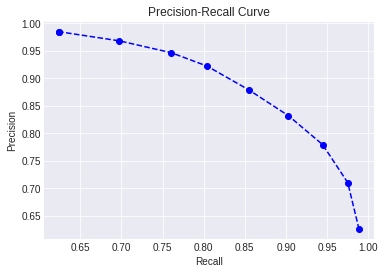

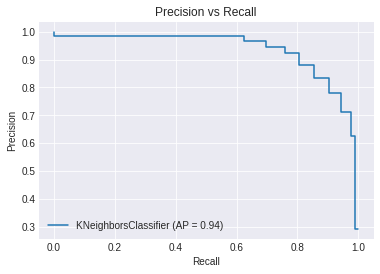

In [136]:
# Plotting the roc-curve
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_curve
plt.style.use("seaborn-darkgrid")

plt.figure(figsize = (13, 4))
plt.subplot(1,2,1)
plt.plot(knn_threshold['Recall'], knn_threshold['Precision'], '--ob')
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")

plot_precision_recall_curve(neighbors,X_test, y_test)
plt.title("Precision vs Recall")

#### <b>Conclusion from the above dataset for Logistic Regression:</b>
* If we aim to have a higher recall at the cost of precision, from the above dataset we would go with a threshold of 0.20.
* However, if we want a high precision, we may go with threshold of 0.90. If we want to have a better overall score of precision and recall, we can so with a threshold of 0.50, with a F1 score of 0.87.
* The AP (Area of the precision-recall curve) for the KNN Classifier, is the highest out of the three with a score of 0.94.



## <b>Logistic Regression: 

In [137]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(class_weight = 'balanced', penalty = 'l2')
reg.fit(X_train, y_train)
y_pred_reg = reg.predict(X_test)

In [138]:
y_pred_proba_reg = reg.predict_proba(X_test)

In [139]:
# Printing precision score
precision_score(y_pred_reg, y_test)

0.7184035476718403

In [140]:
# Applying the above function
reg_threshold = pd.DataFrame(plot_pr_curve(y_test,y_pred_proba_reg, np.linspace(0.1, 0.99, 10))).transpose()
reg_threshold.columns = ['Recall', 'Precision']
reg_threshold.index = np.linspace(0.1, 0.99, 10)
reg_threshold['F1 score'] = (2 * reg_threshold['Recall'] * reg_threshold['Precision']) / (reg_threshold['Precision'] + reg_threshold['Recall'])
reg_threshold.index.rename('Threshold', inplace = True)
reg_threshold.head(10)
reg_threshold.head(10)

,Recall,Precision,F1 score
Threshold,,,
0.100000,0.984922,0.315483,0.477891
0.198889,0.929047,0.399504,0.558741
0.297778,0.871840,0.478462,0.617850
0.396667,0.801330,0.585548,0.676652
0.495556,0.722395,0.719841,0.721116
0.594444,0.664745,0.825441,0.736428
0.693333,0.583149,0.894558,0.706040
0.792222,0.525055,0.933754,0.672154
0.891111,0.474945,0.949468,0.633166


Text(0.5, 1.0, 'Precision vs Recall')

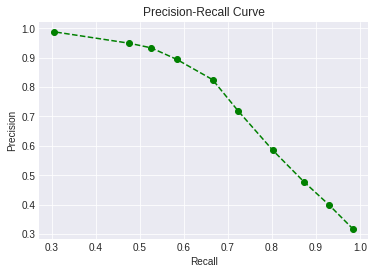

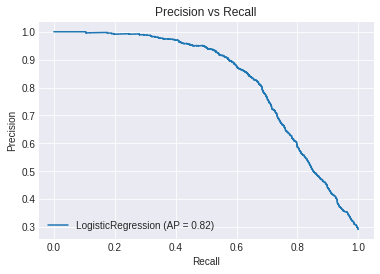

In [141]:
# Plotting the pr-curve
plt.figure(figsize = (13, 4))

plt.subplot(1,2,1)
plt.style.use("seaborn-darkgrid")
plt.plot(reg_threshold['Recall'], reg_threshold['Precision'], '--og')
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")

plot_precision_recall_curve(reg,X_test, y_test)
plt.title("Precision vs Recall")

#### <b>Conclusion from the above dataset for Logistic Regression:</b>
* If we aim to have a higher recall at the cost of precision, from the above dataset we would go with a threshold of 0.20.
* However, if we want a high precision, we may go with threshold of 0.80. If we want to have a better overall score of precision and recall, we can so with a threshold of 0.60, with a F1 score of 0.73.
* The AP score for the logistic regression with l2 regularization, is the least out of the three with a value of 0.82.



# <b>Conclusions and Overall Summary:


#### <b>Talking about the dataset and plans to improve subscription counts :</b>
* While performing EDA and reading abuout the results we found out that the bank had targeted clients mostly from management professionals, blue-collared and administrators. However, we found that the ratio of the success of a bank in subscribing a client is much more in students, retired clients and even housemaids.
* Bank authorities have last contacted clients much more in the months of May, however the percentage of clients subscribing were much less. The percentage of success was much higher when the customer was last contacted in September.
* We calculated the feature selection section where we found out that age, job, balance, education, month are some of the most important features in predicting our model.

#### <b>Handled Imbalance using SMOTEENN:</b>
* As our target class was highly imbalanced we used SMOTEENN to underfit some of the majority class and introduce some synthetic datapoints for our minority class. However, the odds was still in the ratio of 3:1. And in such cases accuracy score, roc_auc score must be avoided for such high imbalances and instead we have used the Precision, Recall metrics.

# <b>Considering Recall as our metric, and this is the reason! </b>

##### <b>When to use Precision as our metric?</b>
We have calculated the Precision, Recall and F1 score for various thresholds. Precision should be used when we want to reduce the False Positives in our dataset(FP), without thinking about our False Negative(FN). Precision should be used when we want to predict the minority class with greater confidence.
Suppose the bank wants to reduce the FP such that none of the clients who haven't subscribed to our bank term deposit, should be classified incorrectly. In such cases, the threshold is to be increased, such that even if the recall decreases, our model is correctly able to classify the minority class properly.


##### <b>When to use Recall as our metric?</b>
Suppose the bank wants to reduce the FN such that none of the clients who have subscribed to our bank term deposit, should be classified incorrectly. The Bank Manager does not want any clients who have subscribed to our plans be misclassified because of which they may not be able to avail their returns, even after paying a high principal amount. This may lead to a bad reputation of the bank. In such cases, the threshold is to be decreased, such that even if the precision decreases, our model is correctly able to classify the clients who have subscribed to our plans.